In [45]:
import pickle, cPickle
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

ModuleNotFoundError: No module named 'cPickle'

In [48]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def createTrainingSet():
    labels = []
    data = []
    for i in range(5):
        batch = unpickle("cifar-10-batches-py/data_batch_%d" % (i+1))
        batch_label = batch[b'labels']
        batch_data = batch[b'data']
        labels.extend(batch_label)
        data.extend(batch_data)
    return labels, data

def createTestSet(path):
    batch = unpickle(path)
    label = batch[b'labels']
    data = batch[b'data']
    return label, data
                     
train_labels, train_data = createTrainingSet()
test_labels, test_data = createTestSet("cifar-10-batches-py/test_batch")


# # train_data_m = np.asarray([val for sublist in train_data for val in sublist]).reshape(50000, 32*32*3)
# train_labels = np.asarray(train_labels)
# # test_data = 
# test_labels = np.asarray(test_labels)

# print(len(train_data))
# train_data[1]      
# train_data.shape[0]
train_labels

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [39]:
num_labels = 10
num_train = len(train_data)
num_train

50000

In [42]:
dataset = np.loadtxt("../test/pima-indians-diabetes.csv", delimiter=",")
dataset[:5]

array([[  6.00000000e+00,   1.48000000e+02,   7.20000000e+01,
          3.50000000e+01,   0.00000000e+00,   3.36000000e+01,
          6.27000000e-01,   5.00000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   8.50000000e+01,   6.60000000e+01,
          2.90000000e+01,   0.00000000e+00,   2.66000000e+01,
          3.51000000e-01,   3.10000000e+01,   0.00000000e+00],
       [  8.00000000e+00,   1.83000000e+02,   6.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   2.33000000e+01,
          6.72000000e-01,   3.20000000e+01,   1.00000000e+00],
       [  1.00000000e+00,   8.90000000e+01,   6.60000000e+01,
          2.30000000e+01,   9.40000000e+01,   2.81000000e+01,
          1.67000000e-01,   2.10000000e+01,   0.00000000e+00],
       [  0.00000000e+00,   1.37000000e+02,   4.00000000e+01,
          3.50000000e+01,   1.68000000e+02,   4.31000000e+01,
          2.28800000e+00,   3.30000000e+01,   1.00000000e+00]])

In [ ]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

x_image = tf.reshape(x, [-1, 28, 28, 1])

In [36]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

NameError: name 'model' is not defined

In [ ]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
#
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

#
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

#
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

#
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [ ]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [ ]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

start_time = time.time()

for i in range(4000):
    batch = mnist.train.next_batch(50)
    
    if i % 100 == 0: 
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    
print("test accuracy %g" % accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
total_time = (time.time() - start_time) / 3600
print("time {0:.2f}".format(total_time))  

In [25]:
dropouts = [0, 0.1 , 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
import random
acc = [random.uniform(0, 1) for i in range(11)]
dropouts

[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

histogram of accuracy vs dropout rate 

<function matplotlib.pyplot.show>

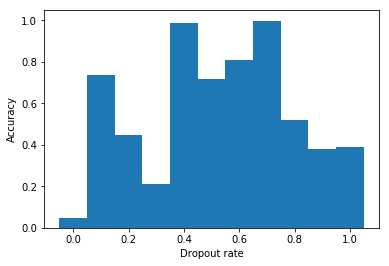

In [34]:
width = 0.1

plt.bar(dropouts, acc, width, align='center')

plt.ylabel('Accuracy')
plt.xlabel('Dropout rate')
plt.show